In [52]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [53]:
erp=pd.read_excel("erp.xlsx")
liaison=pd.read_excel("liaison.xlsx")
web=pd.read_excel("web.xlsx")
web=web.rename(columns={"sku":"id_web"})


In [54]:
web.head(5)

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [55]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_web                 1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [56]:
erp.head(5)

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [57]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [58]:
liaison

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [59]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


## Nettoyage des données

In [60]:
#verification unicité id_web et product_id
web["id_web"].is_unique,erp["product_id"].is_unique
   

(False, True)

In [61]:
#selectionne les post_type qui sont egale à product
web=web[web["post_type"]=="product"]

#suppression des lignes ou le id est null 
#web=web.dropna(subset=["id_web"])
#erp=erp.dropna(subset=["product_id"])

# drop dupplicates
join_with_product=jointure.drop_duplicates()

#verification unicité id_web avec les product
web["id_web"].is_unique


False

In [62]:
#double jointure entre web et liaison et erp
jointure=erp.merge(web.merge(liaison,on="id_web"),on="product_id")


In [70]:
jointure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 0 to 895
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   product_id             896 non-null    int64         
 1   onsale_web             896 non-null    int64         
 2   price                  896 non-null    float64       
 3   stock_quantity         896 non-null    int64         
 4   stock_status           896 non-null    object        
 5   id_web                 714 non-null    object        
 6   virtual                896 non-null    int64         
 7   downloadable           896 non-null    int64         
 8   rating_count           896 non-null    int64         
 9   average_rating         896 non-null    float64       
 10  total_sales            896 non-null    float64       
 11  tax_status             896 non-null    object        
 12  tax_class              0 non-null      float64       
 13  post_

## 1/ Chiffre d'affaires par produit

In [63]:
join_with_product["CA"]=join_with_product["price"]*join_with_product["total_sales"]
ca_prod=join_with_product[["product_id","price","CA"]]
ca_prod



,product_id,price,CA
0,3847,24.2,145.2
1,3849,34.3,0.0
2,3850,20.8,0.0
3,4032,14.1,42.3
4,4039,46.0,0.0
...,...,...,...
709,6930,8.4,42.0
710,7023,27.5,0.0
711,7025,69.0,0.0
712,7247,54.8,0.0


## 2/   Total du chiffre d'affaires realisé en ligne 

In [64]:
chif_aff_web=join_with_product["CA"].sum()
print(" Total du chiffre d'affaires realisé en ligne est de {} €".format(chif_aff_web))




 Total du chiffre d'affaires realisé en ligne est de 70568.6 €


## 3/ Affichage des données abérrantes avec graphique 

<AxesSubplot:xlabel='price'>

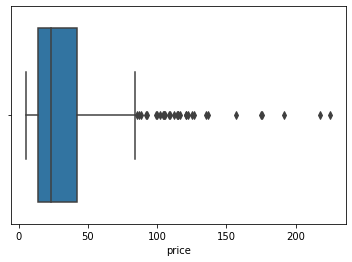

In [65]:
#boxplot utilisé pour afficher les données aberrantes
sns.boxplot(x='price',data=join_with_product)

In [66]:
#methode IQR (interquartile range) 
q3=join_with_product['price'].quantile(0.75)
q1=join_with_product['price'].quantile(0.25)
iqr=q3-q1

#calcul du seuil
seuil=q3+1.5*iqr

In [67]:
outlier=join_with_product[join_with_product["price"]>seuil]
#outlier

## Présentation des données superieurs au seuil par un histogramme

<AxesSubplot:xlabel='price', ylabel='Count'>

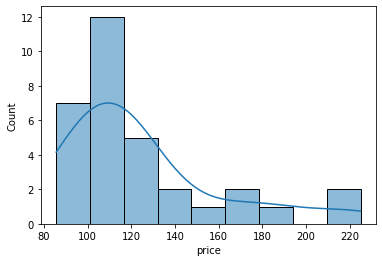

In [68]:
#affichage des données superieurs au seuil
sns.histplot(data=outlier, x="price", kde=True)

<AxesSubplot:xlabel='price', ylabel='Count'>

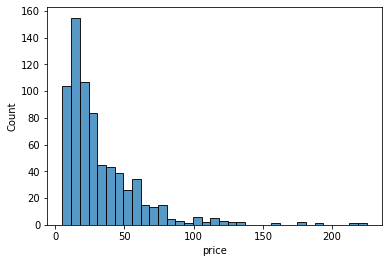

In [69]:
#repartition des prix 
sns.histplot(x="price",data=join_with_product)